In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pylab as plt 
from scipy import stats
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset
xls = pd.ExcelFile(r"C:\Users\91739\Downloads\EastWestAirlines (1).xlsx")
airline = pd.read_excel(xls, 'data')
airline

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
airline2=airline.drop(['ID#'],axis=1)
airline2

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [5]:
# Normalize heterogenous numerical data 
from sklearn.preprocessing import MinMaxScaler
data_norm = pd.DataFrame(MinMaxScaler().fit_transform(airline2), columns=airline2.columns)
data_norm

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Award?  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        1.0  
...      ...  
3994     1.0  
3995     1.0  
3996     1.0  
3997     0.0  
3998     0.0  

[3999 rows x 11 columns]

HIERARCHIAL CLUSTERING

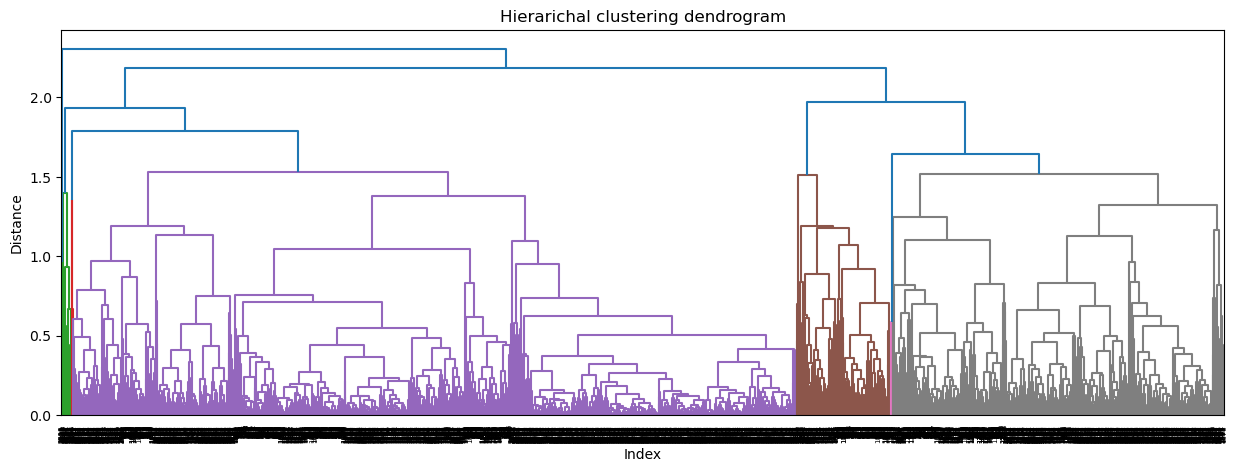

In [6]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='complete', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

#Insights from dendrograms

Here we can cut the dendrogram at a distance of 1.5 as we can separate the clusters into 5 clusters.
We cannot totally intrepret the dendrogram as it have many branches from the bottom of the tree. As there are more data points, K-means clustering would be more effective to create the clusters.

In [7]:
# Create Clusters 
h = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward').fit(data_norm)
cluster_labels = pd.Series(h.labels_)
airline2['cluster'] = cluster_labels
airline2

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  cluster  
0          0        1  
1          0        1  
2          0        1  
3          0        1  
4          1        3  
...      ...      ...  
3994       1        0  
3995       1        0  
3996       1        0  
3997       0        4  
3998       0        4  

[3999 rows x 12 columns]

# Exploring on different types of linkages and distance metrics to check the best clustering linkage

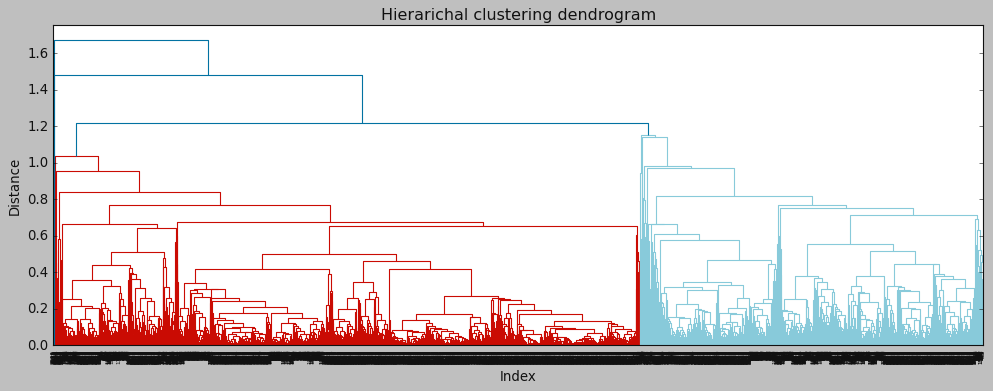

In [64]:
#average linkage

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='average', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

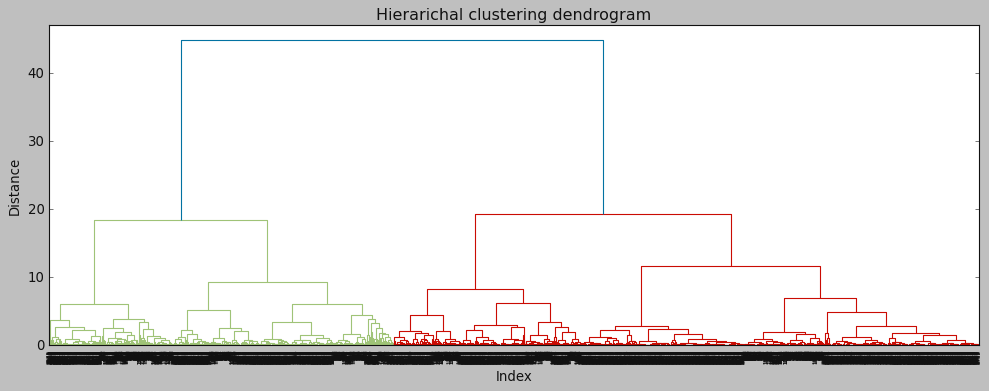

In [65]:
#ward linkage
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='ward', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

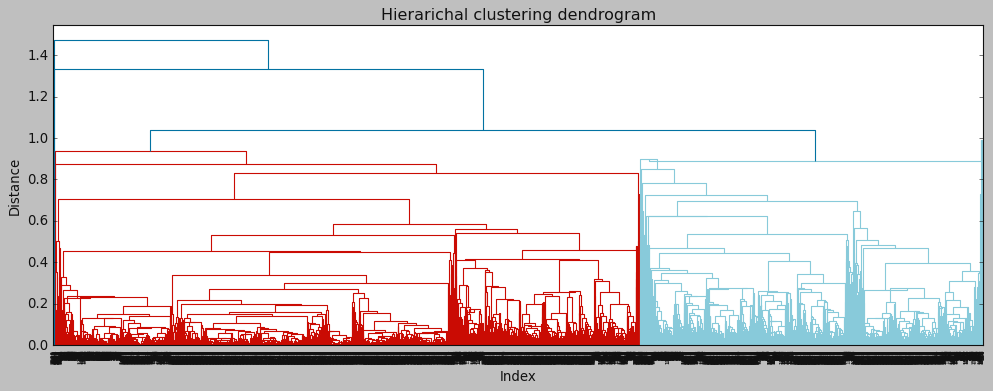

In [66]:
#centroid linkage
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='centroid', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

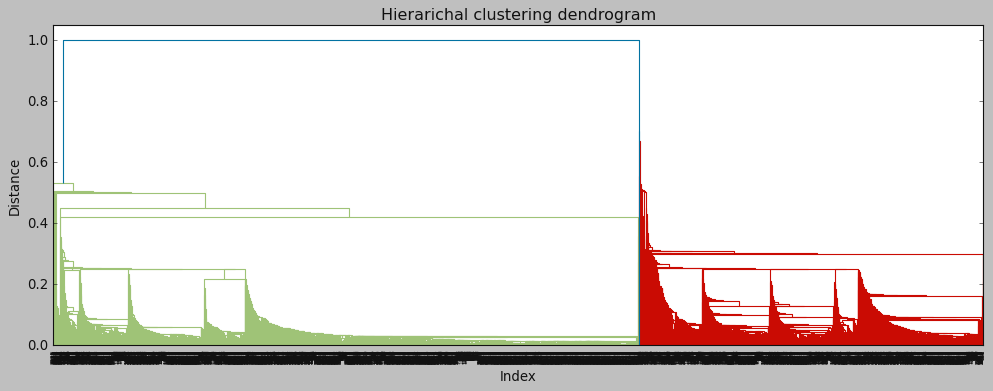

In [67]:
#single linkage
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='single', metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

# exploring on distance metrics

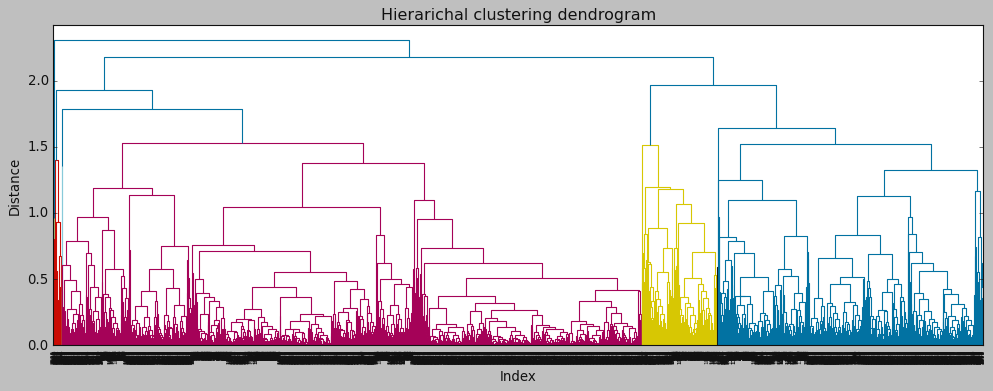

In [69]:
#minkowski distance metric
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='complete', metric='minkowski')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

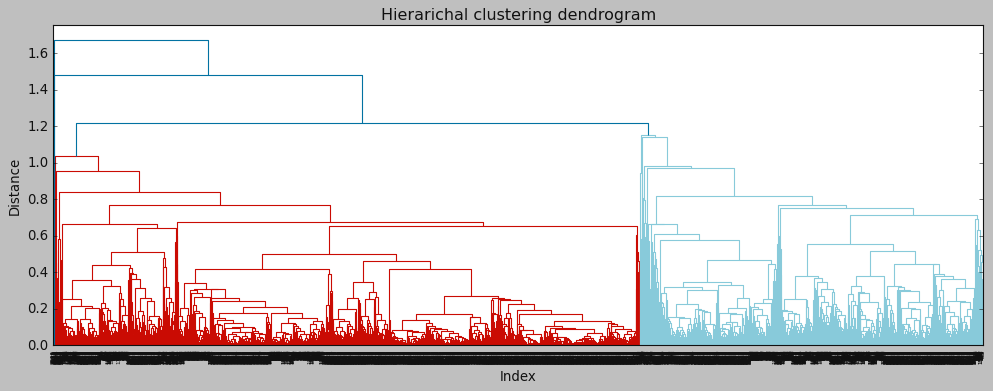

In [70]:
#minkowski-average distance metric
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='average', metric='minkowski')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

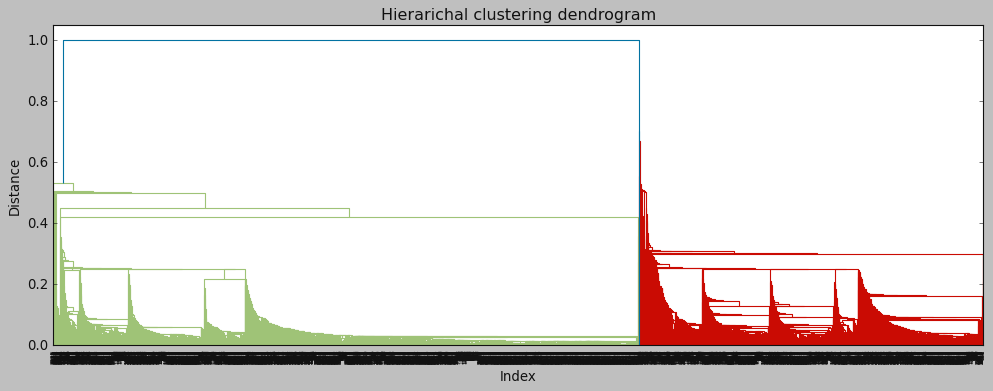

In [72]:
#minkowski-single distance metric
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method='single', metric='minkowski')
plt.figure(figsize=(15,5))
plt.title("Hierarichal clustering dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [8]:
# 5 clusters data
data_norm.groupby(airline2.cluster).mean()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
cluster                                                                       
0        0.046836    0.025574   0.174947   0.012156   0.000000     0.045811   
1        0.025406    0.001929   0.000000   0.016815   0.000247     0.009718   
2        0.062306    0.014466   0.549505   0.000619   0.006498     0.100340   
3        0.074773    0.014424   0.840654   0.000000   0.012617     0.222451   
4        0.017605    0.008796   0.000000   0.000000   0.000000     0.009680   

         Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
cluster                                                                       
0           0.141084           0.025374         0.044717           0.526908   
1           0.063660           0.005501         0.009873           0.595452   
2           0.190277           0.006449         0.010531           0.526314   
3           0.258552           0.032161         0.056710           0.611313   
4           0.070949           0.011042         0.017896           0.188915   

         Award?  
cluster          
0           1.0  
1           0.0  
2           0.0  
3           1.0  
4           0.0

In [9]:
#customers in cluster 1
airline2[(airline2.cluster==1)]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3786    27669           0          1          1          1         3219   
3790    73159           0          1          1          1          358   
3793    38827           0          1          1          1            0   
3794    29919           0          1          1          1         1225   
3959    13942           0          1          2          1         5822   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
5               0                  0                0               6942   
...           ...                ...              ...                ...   
3786            7                  0                0               3413   
3790            4                358                4               3237   
3793            0                  0                0               2993   
3794            3                  0                0               2949   
3959           12                  0                0               1458   

      Award?  cluster  
0          0        1  
1          0        1  
2          0        1  
3          0        1  
5          0        1  
...      ...      ...  
3786       0        1  
3790       0        1  
3793       0        1  
3794       0        1  
3959       0        1  

[1011 rows x 12 columns]

In [10]:
#customers in cluster2 
airline2[(airline2.cluster==2)]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
6       84914           0          3          1          1        27482   
10      40091           0          2          1          1         7278   
12      43382           0          2          1          1        11150   
30     177926           0          3          1          1        20797   
32     276571           0          4          1          1        42044   
...       ...         ...        ...        ...        ...          ...   
3972    35185           0          2          1          1         5957   
3974    58387           0          3          1          1        14581   
3980    28867           0          3          1          1        19169   
3985    59017           0          4          1          1        34746   
3991    39142           0          3          1          1        14981   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
6              25                  0                0               6994   
10             10                  0                0               6959   
12             20                  0                0               6924   
30             13                  0                0               7886   
32             23                  0                0               7872   
...           ...                ...              ...                ...   
3972            7                  0                0               1439   
3974           39                  0                0               1435   
3980           28                  0                0               1425   
3985           25                  0                0               1418   
3991           28                  0                0               1408   

      Award?  cluster  
6          0        2  
10         0        2  
12         0        2  
30         0        2  
32         0        2  
...      ...      ...  
3972       0        2  
3974       0        2  
3980       0        2  
3985       0        2  
3991       0        2  

[808 rows x 12 columns]

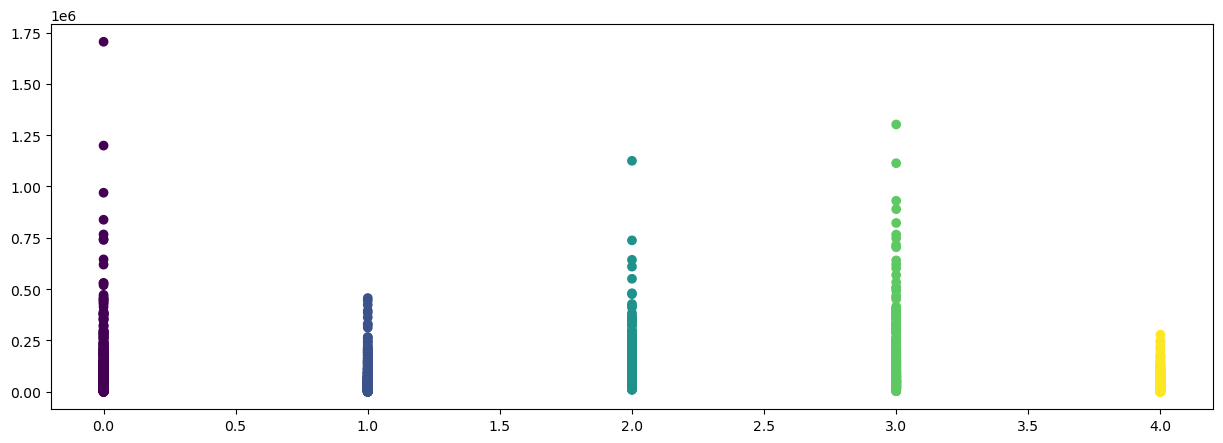

In [11]:
# Plot Clusters according to Hierarchial clustering method
plt.figure(figsize=(15,5))  
plt.scatter(airline2['cluster'],airline2['Balance'], c=cluster_labels)

K-MEANS CLUSTERING

In [12]:
dataset1 = airline.copy()
dataset1.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [13]:
dataset1 =  dataset1.drop(['ID#','Award?'], axis=1)

In [14]:
dataset2 =airline.copy()

In [15]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3999, 10)

In [16]:
from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3999, 10)

In [17]:
#Running PCA of standardized data

# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [18]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [19]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [20]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

#by applying PCA on standardized data with 95% variance it gives 8 PCA components.

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

In [21]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [22]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [23]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

#By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


In [24]:
#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [25]:
#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [26]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,)
model2 = KMeans(random_state=10, max_iter=500, n_init=20,)

In [27]:
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)

model1


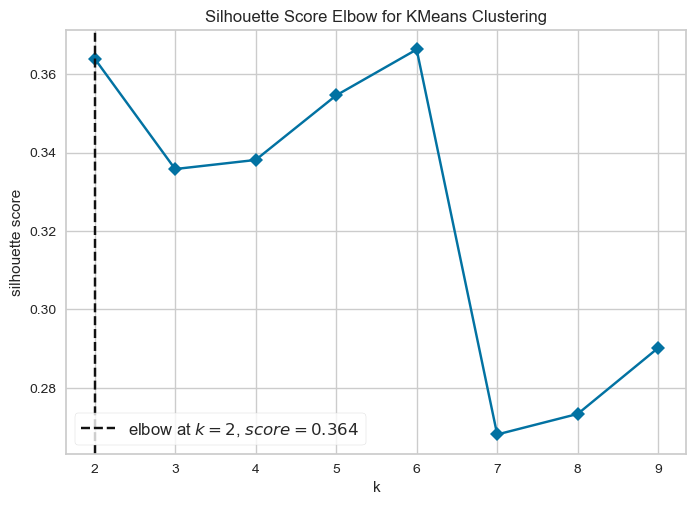

model2


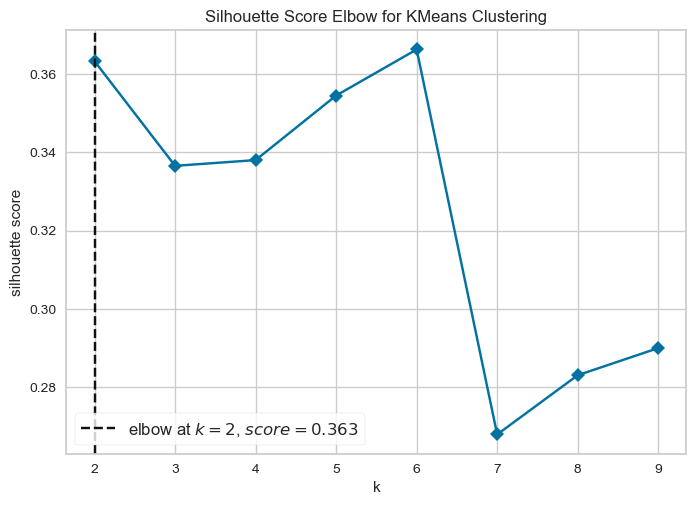

In [28]:
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()

#Conclusion:
#Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.
#Also it is proved that even if we feed data either PCA or scaled data outliers will always affect in kmeans clustering. Also when random_state value, max_iter number n_int chnaged the clustering numbers changed.
#So before using KMeans clustering it is better to have discussion or decision on outliers.

In [29]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961763
For n_clusters = 3 The average silhouette_score is : 0.3358006893686271
For n_clusters = 4 The average silhouette_score is : 0.3381189559647633
For n_clusters = 5 The average silhouette_score is : 0.3545751298691851
For n_clusters = 6 The average silhouette_score is : 0.3662869252330997
For n_clusters = 7 The average silhouette_score is : 0.2681253435179659
For n_clusters = 8 The average silhouette_score is : 0.27336588002771184
For n_clusters = 9 The average silhouette_score is : 0.2902078038474837


In [30]:
#By taking standardize data pca it gives number of cluster =6 with silhoette score = 0.36

In [31]:
#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [32]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0)
model4 = KMeans(random_state=10, max_iter=500, n_init=20)

In [33]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.1589810244178824
For n_clusters = 3 The average silhouette_score is : 0.1589810244178824
For n_clusters = 4 The average silhouette_score is : 0.1589810244178824
For n_clusters = 5 The average silhouette_score is : 0.1589810244178824
For n_clusters = 6 The average silhouette_score is : 0.1589810244178824
For n_clusters = 7 The average silhouette_score is : 0.1589810244178824
For n_clusters = 8 The average silhouette_score is : 0.1589810244178824
For n_clusters = 9 The average silhouette_score is : 0.1589810244178824


By taking pca_minmax_df data it gives minimum number of cluster =4 with silhoette score = 0.1476
If we check silhouette score with standardize data pca kmeans model 0.36>0.14 So we will PCA which is applied on normalizatied data. Since the score is very less. Best score alwways close to +1.

In [34]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0)
y_predict1 = model1.fit_predict(pca_std_df)
y_predict1.shape

(3999,)

In [35]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [-1.04312258e+00,  2.60937871e-01, -1.57354688e-02,
        -8.62930270e-02, -5.29463412e-02,  1.40872802e-01,
         5.55074837e-02,  9.04844177e-04],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01],
       [ 1.39804051e+00, -1.00275351e+00, -7.94776789e-02,
         9.64914049e-02, -2.55443434e-01, -2.46040607e-01,
        -6.93666285e-02, -2.00121569e-02],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01]])

In [38]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16718.170043374106

In [39]:
model1.score(pca_std_df) 

# it is opposite value of sum of squared value..avoid to use it. It is bit confusing

-16718.170043374106

In [40]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

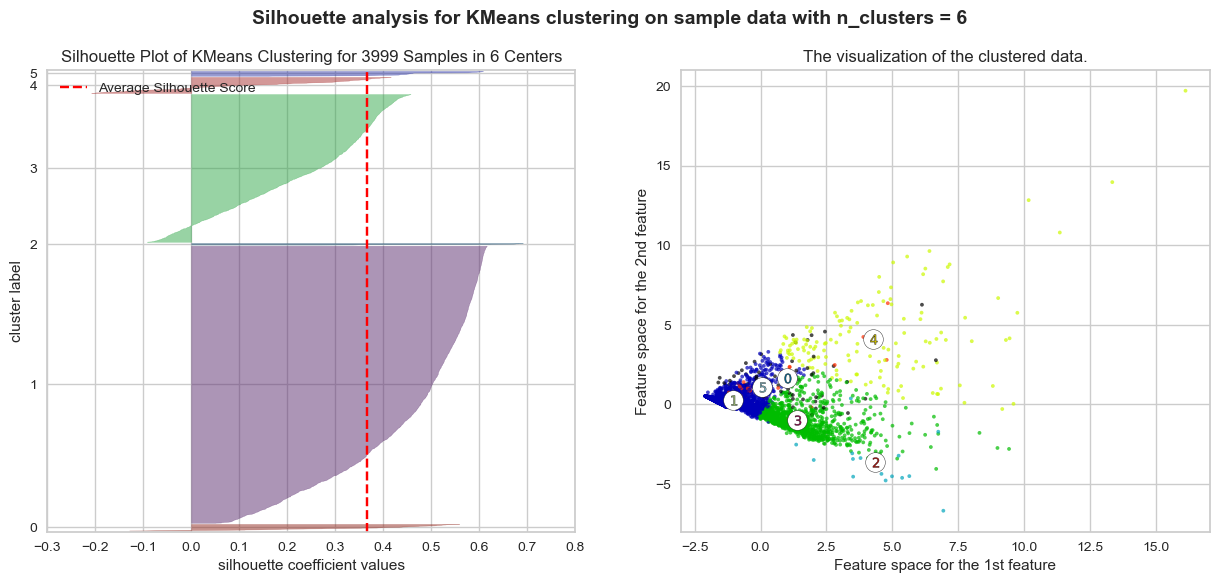

In [41]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [42]:
#Putting Cluster lables into original dataset And analysis of the same.

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Kmeans_Clustering'])

In [43]:
# Concating model1_Cluster df with main dataset copy

Kmeans_df = pd.concat([dataset2.copy(), model1_cluster], axis=1)
Kmeans_df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   Kmeans_Clustering  
0                  1  
1                  1  
2                  1  
3                  1  
4                  3

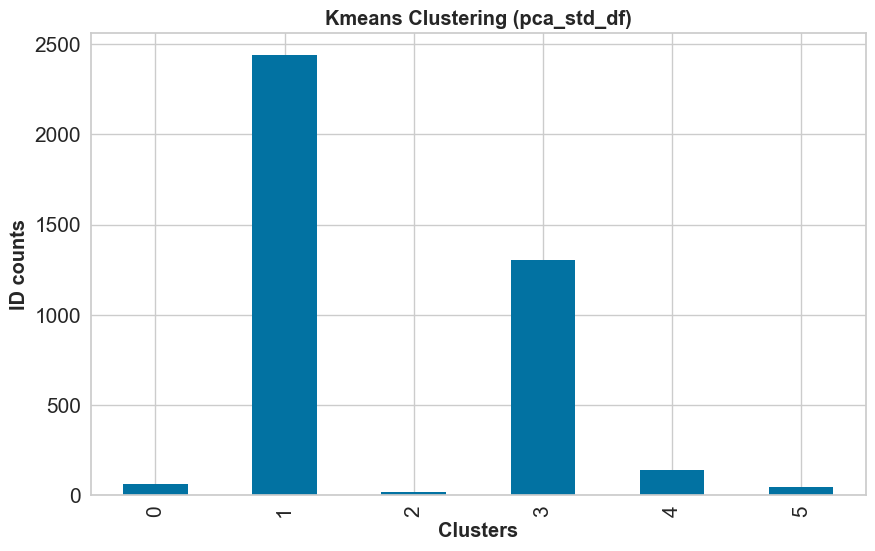

In [44]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
Kmeans_df.groupby(['Kmeans_Clustering']).count()['ID#'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

DBSCAN CLUSTERING

In [45]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [46]:
# Import .csv file and convert it to a DataFrame object
xls = pd.ExcelFile(r"C:\Users\91739\Downloads\EastWestAirlines (1).xlsx")
df = pd.read_excel(xls, 'data')

print(df.head())
df  

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [48]:
df1 = df.drop(['cc3_miles','cc1_miles','cc2_miles','Flight_miles_12mo','Flight_trans_12','Award?','Qual_miles','Days_since_enroll','Bonus_trans' ],axis=1)    
df1

ID#  Balance  Bonus_miles
0        1    28143          174
1        2    19244          215
2        3    41354         4123
3        4    14776          500
4        5    97752        43300
...    ...      ...          ...
3994  4017    18476         8525
3995  4018    64385          981
3996  4019    73597        25447
3997  4020    54899          500
3998  4021     3016            0

[3999 rows x 3 columns]

In [49]:
array=df.values
array  

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [50]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

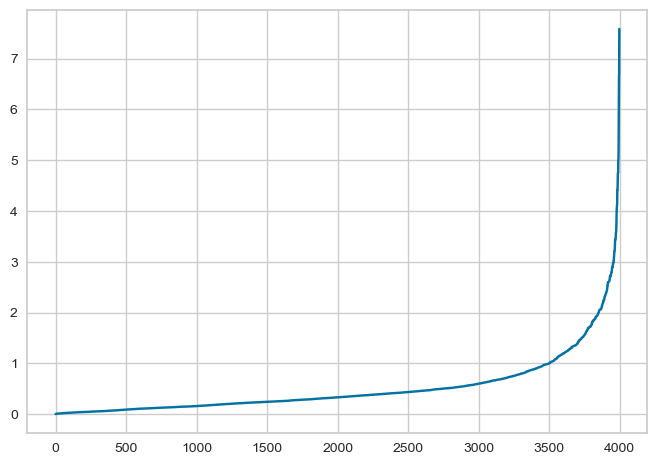

In [51]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X) 

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances) 

In [52]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X) 

DBSCAN(eps=2)

In [53]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [55]:
cl
pd.set_option("display.max_rows", None)

In [56]:
cl 

cluster
0           0
1           0
2           0
3           0
4           1
5           0
6           0
7           1
8          -1
9           1
10          0
11          1
12          0
13          0
14          0
15          1
16          1
17          1
18          1
19          1
20          1
21         -1
22          0
23          0
24          0
25          0
26          0
27          0
28          1
29          1
30          0
31          0
32          0
33          0
34          0
35          1
36          1
37          0
38          1
39          1
40          0
41          1
42          1
43          1
44          0
45          1
46          0
47          1
48          1
49          0
50         -1
51          0
52          1
53          1
54          0
55          0
56          0
57          1
58          0
59          1
60          0
61          0
62          0
63          0
64          0
65         -1
66          0
67          0
68          1
69          1
70         -1
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          1
79          1
80          1
81          0
82          0
83          0
84          0
85          1
86          1
87         -1
88          0
89          1
90          1
91          0
92          1
93          1
94         -1
95          0
96          0
97          0
98          0
99          1
100         1
101         1
102         0
103         1
104         0
105         1
106        -1
107         1
108         1
109         1
110         0
111         1
112        -1
113         1
114         1
115         0
116         0
117        -1
118         1
119         1
120         0
121        -1
122         1
123         1
124         0
125         1
126        -1
127         2
128         1
129         1
130         1
131         1
132         1
133         1
134         1
135        -1
136         0
137         1
138         1
139         0
140         0
141         0
142         0
143         0
144         0
145         1
146         0
147         1
148         0
149         0
150         1
151        -1
152         0
153         0
154         1
155         0
156         0
157         1
158         1
159         0
160         0
161         1
162         1
163         1
164         1
165         0
166         0
167         1
168         1
169         1
170         1
171         0
172         1
173         1
174         0
175         1
176         1
177         1
178         1
179         1
180         0
181         1
182         0
183         1
184         0
185         0
186        -1
187         0
188         0
189         0
190        -1
191         2
192         1
193         0
194         1
195         0
196         1
197         0
198        -1
199         1
200         1
201         1
202         0
203         1
204         0
205         0
206         1
207         1
208         1
209         0
210         1
211         0
212         0
213         1
214         0
215         0
216         0
217         0
218         1
219         0
220        -1
221         1
222         1
223         0
224         0
225         0
226         5
227         1
228         0
229         0
230         1
231         1
232         0
233         1
234         1
235         1
236         0
237         1
238        -1
239         0
240         0
241         1
242         0
243        -1
244         1
245         1
246         0
247         1
248         1
249         0
250         0
251         0
252         0
253         1
254         1
255         0
256        -1
257         1
258         0
259         1
260         0
261         0
262         0
263         0
264         1
265         1
266         0
267         0
268         1
269         1
270         1
271         1
272         1
273         0
274         0
275        -1
276         0
277         1
278         0
279         1
280         0
281         1
282         0
283         1
284         1
28

In [57]:
df1 = pd.concat([df,cl],axis=1)  
df1   

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [58]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
5        6    16420           0          1          1          1            0   
6        7    84914           0          3          1          1        27482   
7        8    20856           0          1          1          1         5250   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
10      11    40091           0          2          1          1         7278   
11      12    96522           0          5          1          1        61105   
12      13    43382           0          2          1          1        11150   
13      14    43097           0          1          1          1         3258   
14      15    17648           0          1          1          1            0   
15      16    28495           0          4          1          1        49442   
16      17    51890           0          4          1          1        48963   
17      18    13958           0          1          1          1         4291   
18      19    91473           0          3          1          1        27408   
19      20    23354           0          3          1          1        10447   
20      21   120576           0          5          1          1        58831   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
23      24    66275           0          1          1          1         2533   
24      25   205651         500          1          1          1         4025   
25      26    20726           0          1          1          1         1375   
26      27    18521           0          1          1          1         1227   
27      28     8828           0          1          1          1            0   
28      29    59763           0          3          1          1        33772   
29      30    19221           0          1          1          1         4655   
30      31   177926           0          3          1          1        20797   
31      32    10021           0          1          1          1            0   
32      33   276571           0          4          1          1        42044   
33      34    18047           0          1          1          1          100   
34      35    43832           0          1          1          1            0   
35      36   123759           0          4          1          1        50572   
36      37    23193           0          1          1          1          650   
37      38    68666           0          1          1          1          350   
38      39    59990           0          3          1          1        27878   
39      40     2176           0          1          1          1            0   
40      41    34616           0          1          1          1         1750   
41      42    10470           0          4          1          1        38094   
42      43    60313           0          1          1          1        10000   
43      44   619393           0          3          1          1        15008   
44      45   121260           0          3          1          1        18493   
45      46   288865         967          1          1          1        23600   
46      47    92336           0          2          1          1        11214   
47      48    36924           0          1          1          1         5900   
48      49    70312           0       

In [59]:
import matplotlib.pyplot as plt
plt.style.use('classic')   

In [60]:
sep = df1.groupby(df1.cluster).mean()
sep

ID#        Balance   Qual_miles  cc1_miles  cc2_miles  \
cluster                                                                  
-1       1656.121359  241883.203883  1532.776699   2.815534   1.082524   
 0       2175.568563   57768.571838    41.209169   1.696684   1.000000   
 1       1766.259571   77300.932619    88.487749   2.643185   1.000000   
 2        417.600000  138617.200000   146.600000   4.000000   1.000000   
 3       2388.250000   39218.500000     0.000000   1.000000   2.000000   
 4       2417.666667   51096.000000     0.000000   1.000000   3.000000   
 5       2178.428571   40618.000000     0.000000   1.000000   2.000000   
 6       2449.285714   50765.428571  6227.142857   1.000000   1.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
cluster                                                            
-1        1.237864  51507.121359    26.577670        3649.864078   
 0        1.000000   9802.943921     8.917724         190.443717   
 1        1.000000  25567.839969    14.156968         455.353752   
 2        1.000000  49469.200000    36.400000        4125.600000   
 3        1.000000   9189.250000    13.500000         209.375000   
 4        1.000000  15561.666667    14.333333          44.444444   
 5        1.000000   8444.142857    14.285714         250.000000   
 6        1.000000   2577.714286     2.714286         259.571429   

         Flight_trans_12  Days_since_enroll    Award?  
cluster                                                
-1             10.470874        4826.218447  0.791262  
 0              0.559558        3813.889071  0.000000  
 1              1.428025        4576.234303  1.000000  
 2             15.800000        7302.200000  1.000000  
 3              0.812500        3511.187500  0.000000  
 4              0.222222        3603.444444  0.000000  
 5              0.714286        4612.285714  1.000000  
 6              0.714286        3516.857143  0.000000

Text(0.5, 1.0, 'Clusters using DBScan')

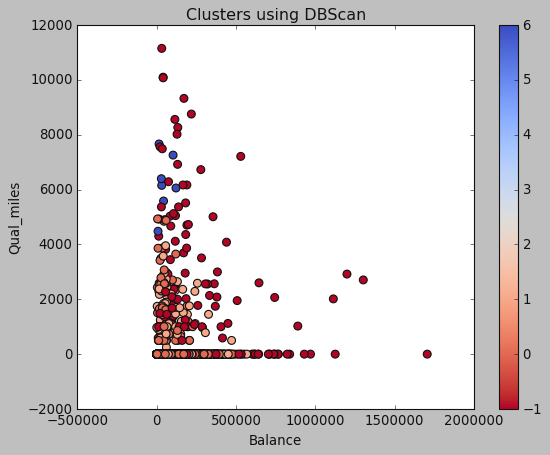

In [61]:
df.plot(x="Balance",y ="Qual_miles",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.coolwarm_r) 
plt.title('Clusters using DBScan')

In [62]:
dl = dbscan.labels_  
dl

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [63]:
import sklearn
sklearn.metrics.silhouette_score(X, dl)

0.21112646945258373